In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
def read_csv(file):
    return pd.read_csv(file, names=['Resolution', 'CHM', 'CHD', 'IFN', 'IRN', 'OPN', 'SMQ', 'SCOH', 'SCOP', 'CMQ', 'CCOH', 'CCOP'])
df = read_csv('bowlinktech__rapidregistryTZ_30_06_02_07_04.csv')
df

Resolution       CHM       CHD       IFN    IRN    OPN       SMQ      SCOH  \
0        0.25  0.517021  0.781292  1.400000  635.0  165.0  0.215665  0.252423   
1        0.35  0.523206  0.787764  1.555556  499.0  165.0  0.200407  0.222960   
2        0.45  0.523206  0.787764  1.555556  499.0  165.0  0.210241  0.235883   
3        0.55  0.528613  0.775416  1.750000  462.0  161.0  0.210759  0.228110   
4        0.65  0.458284  0.750963  1.750000  435.0  165.0  0.199829  0.219532   
5        0.75  0.458284  0.750963  1.750000  435.0  165.0  0.199829  0.219532   
6        0.85  0.457349  0.753936  2.000000  409.0  165.0  0.190908  0.207242   
7        0.95  0.457349  0.753936  2.000000  409.0  165.0  0.190908  0.207242   
8        1.05  0.463055  0.756538  2.000000  412.0  165.0  0.190984  0.206480   

       SCOP       CMQ      CCOH      CCOP  
0  0.036758  0.424052  0.426316  0.002264  
1  0.022554  0.487022  0.489799  0.002778  
2  0.025643  0.450810  0.454438  0.003628  
3  0.017350  0.454826  0.458932  0.004106  
4  0.019703  0.438501  0.443596  0.005095  
5  0.019703  0.438501  0.443596  0.005095  
6  0.016334  0.446820  0.452789  0.005969  
7  0.016334  0.446820  0.452789  0.005969  
8  0.015497  0.450050  0.456707  0.006657

In [3]:
# Normalize data
df_norm = df.copy()

def normalize(df):
    df_min = df.min()
    df_max = df.max()
    df = df.apply(lambda x : (x - df_min)/(df_max - df_min))
    return df

def normalize_data(df):
    df['IFN'] = normalize(df['IFN'])
    df['IRN'] = normalize(df['IRN'])
    return df
    
df_norm = normalize_data(df_norm)
df_norm

Resolution       CHM       CHD       IFN       IRN    OPN       SMQ  \
0        0.25  0.517021  0.781292  0.000000  1.000000  165.0  0.215665   
1        0.35  0.523206  0.787764  0.259259  0.398230  165.0  0.200407   
2        0.45  0.523206  0.787764  0.259259  0.398230  165.0  0.210241   
3        0.55  0.528613  0.775416  0.583333  0.234513  161.0  0.210759   
4        0.65  0.458284  0.750963  0.583333  0.115044  165.0  0.199829   
5        0.75  0.458284  0.750963  0.583333  0.115044  165.0  0.199829   
6        0.85  0.457349  0.753936  1.000000  0.000000  165.0  0.190908   
7        0.95  0.457349  0.753936  1.000000  0.000000  165.0  0.190908   
8        1.05  0.463055  0.756538  1.000000  0.013274  165.0  0.190984   

       SCOH      SCOP       CMQ      CCOH      CCOP  
0  0.252423  0.036758  0.424052  0.426316  0.002264  
1  0.222960  0.022554  0.487022  0.489799  0.002778  
2  0.235883  0.025643  0.450810  0.454438  0.003628  
3  0.228110  0.017350  0.454826  0.458932  0.004106  
4  0.219532  0.019703  0.438501  0.443596  0.005095  
5  0.219532  0.019703  0.438501  0.443596  0.005095  
6  0.207242  0.016334  0.446820  0.452789  0.005969  
7  0.207242  0.016334  0.446820  0.452789  0.005969  
8  0.206480  0.015497  0.450050  0.456707  0.006657

In [4]:
# Adjust values of IFN, IRN, SCOP and CCOP to 1-x, (lower values mean better results) 
def adjust_values(df):
    df['IFN'] = df['IFN'].apply(lambda x: 1-x)
    df['IRN'] = df['IRN'].apply(lambda x: 1-x)
    df['SCOP'] = df['SCOP'].apply(lambda x: 1-x)
    df['CCOP'] = df['CCOP'].apply(lambda x: 1-x)
    return df
df_norm = adjust_values(df_norm)
df_norm

Resolution       CHM       CHD       IFN       IRN    OPN       SMQ  \
0        0.25  0.517021  0.781292  1.000000  0.000000  165.0  0.215665   
1        0.35  0.523206  0.787764  0.740741  0.601770  165.0  0.200407   
2        0.45  0.523206  0.787764  0.740741  0.601770  165.0  0.210241   
3        0.55  0.528613  0.775416  0.416667  0.765487  161.0  0.210759   
4        0.65  0.458284  0.750963  0.416667  0.884956  165.0  0.199829   
5        0.75  0.458284  0.750963  0.416667  0.884956  165.0  0.199829   
6        0.85  0.457349  0.753936  0.000000  1.000000  165.0  0.190908   
7        0.95  0.457349  0.753936  0.000000  1.000000  165.0  0.190908   
8        1.05  0.463055  0.756538  0.000000  0.986726  165.0  0.190984   

       SCOH      SCOP       CMQ      CCOH      CCOP  
0  0.252423  0.963242  0.424052  0.426316  0.997736  
1  0.222960  0.977446  0.487022  0.489799  0.997222  
2  0.235883  0.974357  0.450810  0.454438  0.996372  
3  0.228110  0.982650  0.454826  0.458932  0.995894  
4  0.219532  0.980297  0.438501  0.443596  0.994905  
5  0.219532  0.980297  0.438501  0.443596  0.994905  
6  0.207242  0.983666  0.446820  0.452789  0.994031  
7  0.207242  0.983666  0.446820  0.452789  0.994031  
8  0.206480  0.984503  0.450050  0.456707  0.993343

In [45]:
def calculate_total(df):
    df['Total'] = (df.loc[:,'CHM':'IRN'].sum(axis=1) + df.loc[:,'SMQ'] + df.loc[:,'CMQ'])/6
    return df

df_norm = calculate_total(df_norm)
df_norm


Resolution       CHM       CHD       IFN       IRN    OPN       SMQ  \
0        0.25  0.517021  0.781292  1.000000  0.000000  165.0  0.215665   
1        0.35  0.523206  0.787764  0.740741  0.601770  165.0  0.200407   
2        0.45  0.523206  0.787764  0.740741  0.601770  165.0  0.210241   
3        0.55  0.528613  0.775416  0.416667  0.765487  161.0  0.210759   
4        0.65  0.458284  0.750963  0.416667  0.884956  165.0  0.199829   
5        0.75  0.458284  0.750963  0.416667  0.884956  165.0  0.199829   
6        0.85  0.457349  0.753936  0.000000  1.000000  165.0  0.190908   
7        0.95  0.457349  0.753936  0.000000  1.000000  165.0  0.190908   
8        1.05  0.463055  0.756538  0.000000  0.986726  165.0  0.190984   

       SCOH      SCOP       CMQ      CCOH      CCOP     Total  
0  0.252423  0.963242  0.424052  0.426316  0.997736  0.489672  
1  0.222960  0.977446  0.487022  0.489799  0.997222  0.556818  
2  0.235883  0.974357  0.450810  0.454438  0.996372  0.552422  
3  0.228110  0.982650  0.454826  0.458932  0.995894  0.525295  
4  0.219532  0.980297  0.438501  0.443596  0.994905  0.524867  
5  0.219532  0.980297  0.438501  0.443596  0.994905  0.524867  
6  0.207242  0.983666  0.446820  0.452789  0.994031  0.474835  
7  0.207242  0.983666  0.446820  0.452789  0.994031  0.474835  
8  0.206480  0.984503  0.450050  0.456707  0.993343  0.474559

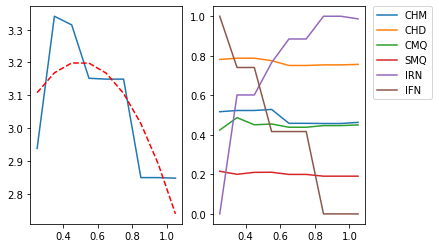

In [43]:
def plot(df_norm):
    x = df_norm['Resolution']
    y = df_norm['Total']
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    ax1.plot(x,y)
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)
    ax1.plot(x,p(x),'r--')
    
    
    ax2.plot(x, df_norm['CHM'], label='CHM')
    ax2.plot(x, df_norm['CHD'], label='CHD')
    ax2.plot(x, df_norm['CMQ'], label='CMQ')
    ax2.plot(x, df_norm['SMQ'], label='SMQ')
    ax2.plot(x, df_norm['IRN'], label='IRN')
    ax2.plot(x, df_norm['IFN'], label='IFN')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

plot(df_norm)




Data for chenzhao5001__dy_30_06_07_39_33.csv


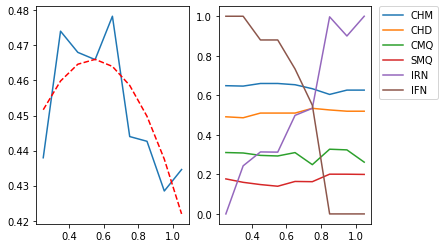




Data for GiggiC__ISSSR_backend_30_06_03_13_46.csv


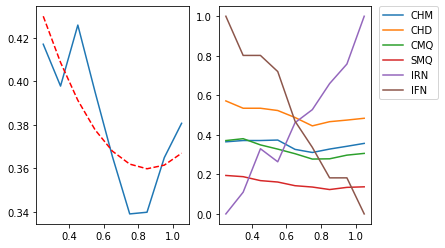




Data for spring-blog_30_06_14_45_44.csv


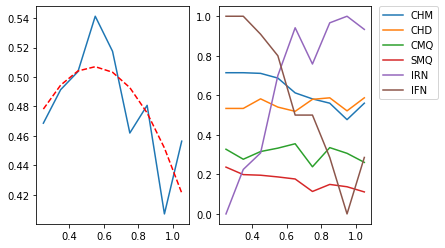




Data for phjjava__-_30_06_06_33_56.csv


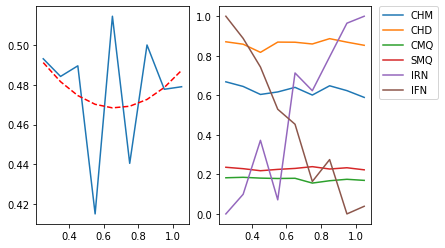




Data for JackJBlundell__unisponsor-temp_30_06_02_10_54.csv


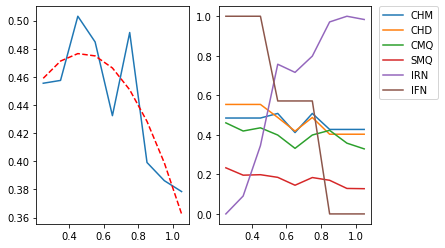




Data for SunGitShine__tgm-gateway_30_06_02_48_24.csv


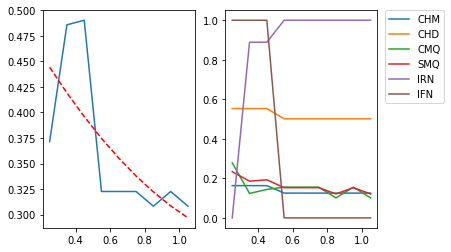




Data for heyuanteam__youlaiyouqu-boss_30_06_02_02_06.csv


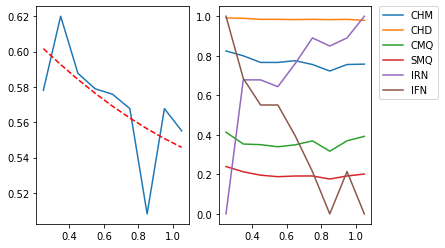




Data for Aaryatech__ATSTaskAdmin_30_06_00_57_05.csv


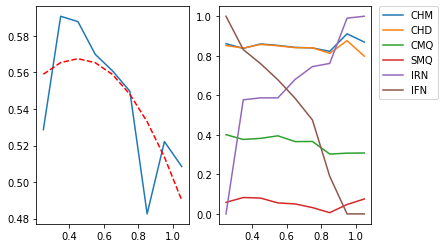




Data for spring-blog_30_06_17_03_00.csv


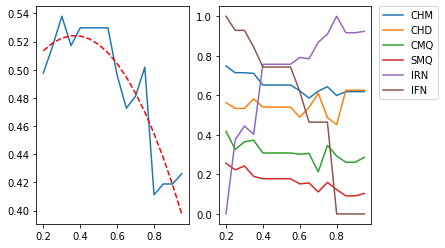




Data for nagaraju275521__FlowOFMoneyRepo_30_06_05_04_51.csv


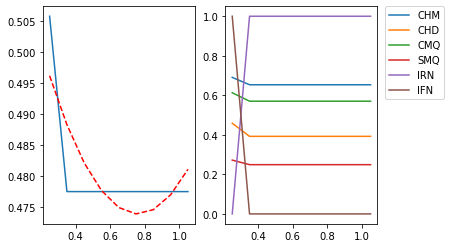




Data for jxstngp__WMSJ_30_06_03_08_13.csv


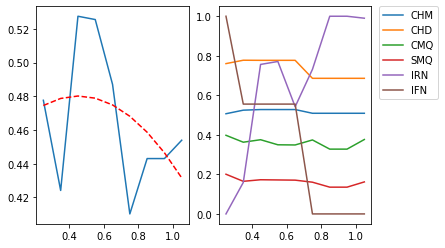




Data for chunsa1615__local_cuber_30_06_03_56_07.csv


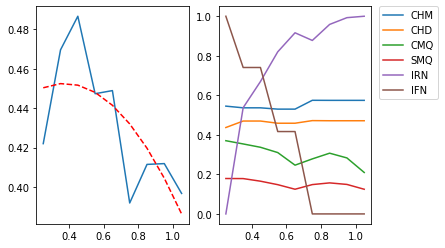




Data for spring-blog_30_06_18_50_17.csv


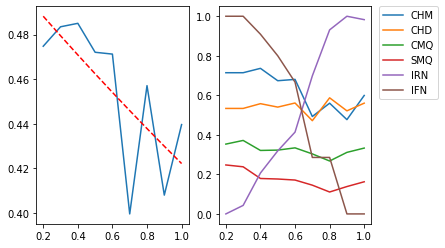




Data for ASadmin1__WorkFlown_30_06_06_03_51.csv


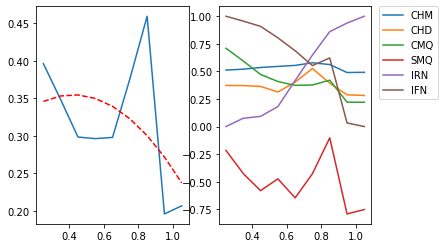




Data for zhoumingkun__cityDisplay_30_06_08_11_15.csv


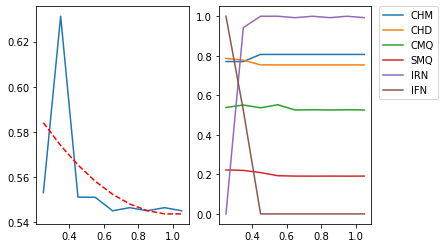




Data for spring-blog_30_06_17_15_11.csv


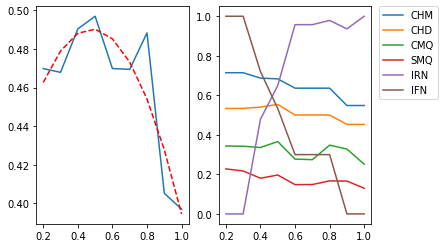




Data for spring-blog_30_06_18_58_04.csv


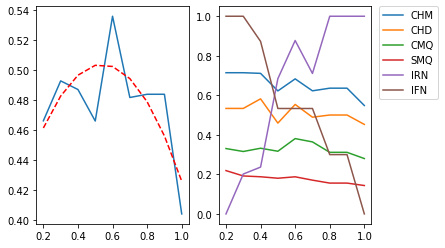




Data for spring-blog_01_07_16_35_37.csv


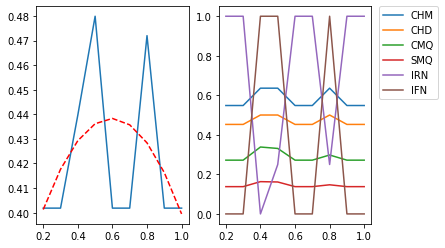




Data for Camphor-Tree__LogpieShoppingManagementToolV1_30_06_02_22_43.csv


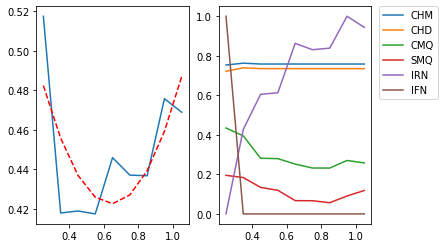




Data for susuYin__gqyuier_30_06_08_04_53.csv


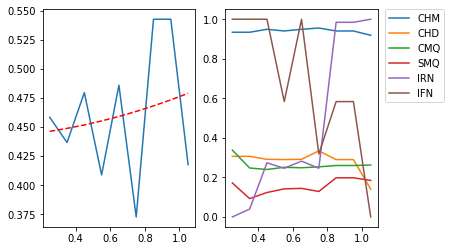




Data for Aaryatech__HrEasyGfpl_30_06_06_15_44.csv


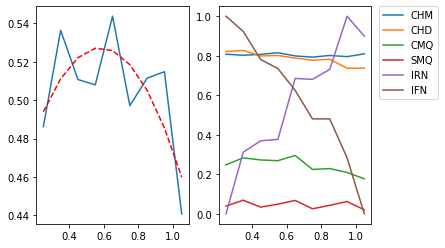




Data for KimSangHak__ERP_30_06_03_34_31.csv


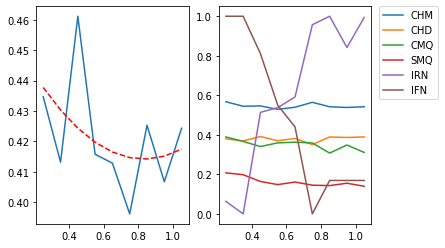




Data for bowlinktech__fpdrapidregistry_30_06_06_09_58.csv


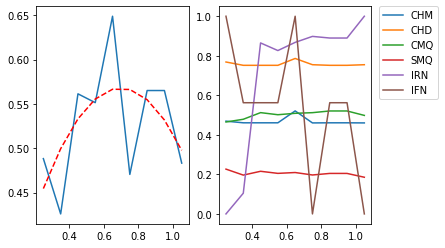




Data for spring-blog_30_06_18_56_34.csv


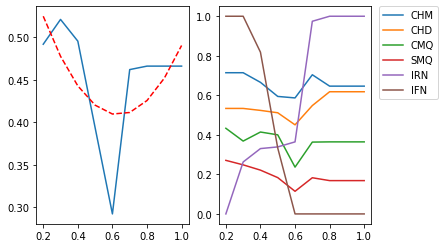




Data for spring-blog_30_06_17_10_51.csv


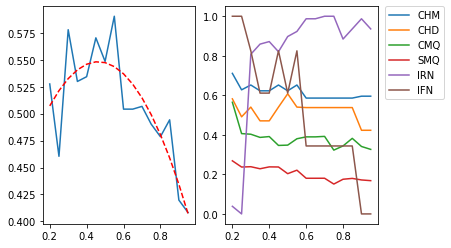




Data for chenseng123__prod_mes_30_06_04_32_48.csv


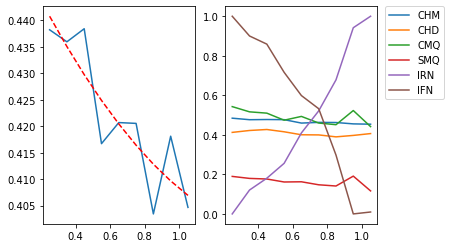




Data for spring-blog_30_06_18_48_13.csv


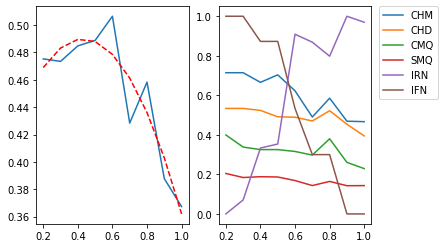




Data for SunnnKim__Pickme_30_06_04_16_02.csv


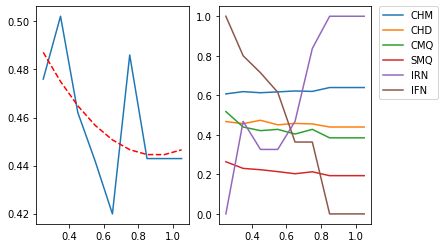




Data for companieshouse__company-accounts.web.ch.gov.uk_30_06_01_26_23.csv


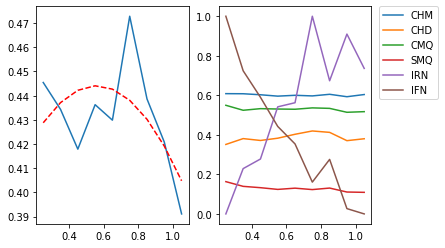




Data for bowlinktech__rapidregistryTZ_30_06_02_07_04.csv


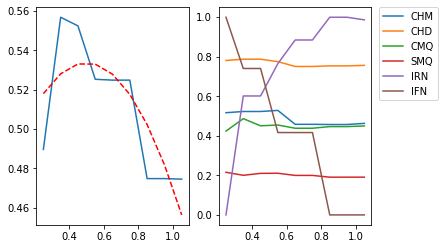




Data for Ripple-Java__Medicine-Project_30_06_02_20_34.csv


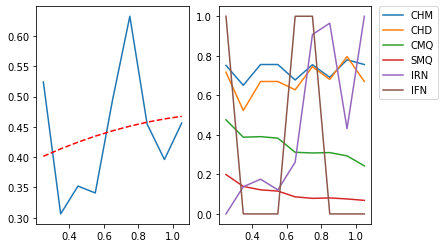




Data for Aaryatech__HrEsayWebApiPune_30_06_05_16_34.csv


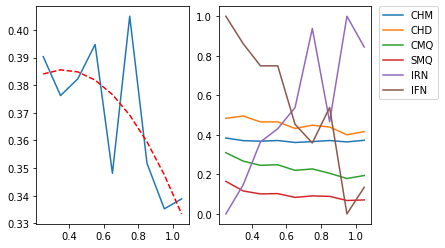




Data for hodolee246__SMS_Project_30_06_03_37_27.csv


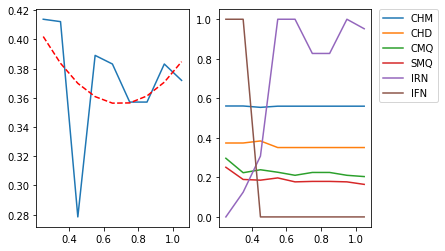




Data for spring-blog_30_06_16_43_01.csv


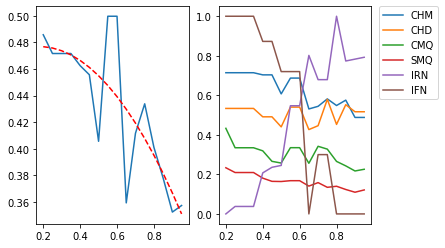




Data for lililiminhao__1137366521_30_06_08_26_03.csv


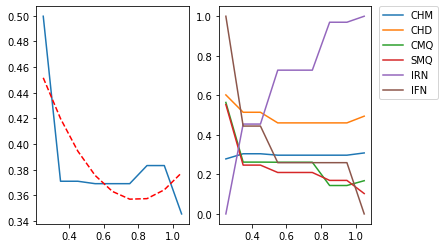




Data for LouiMinister__mythingbee1_30_06_00_53_39.csv


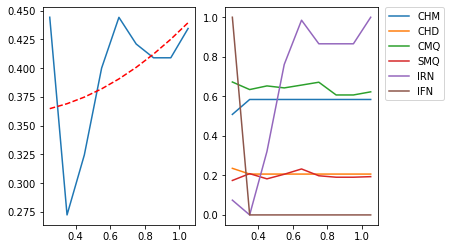




Data for DJHyun__finalProject_30_06_03_06_19.csv


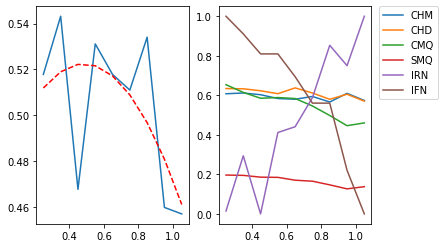




Data for AllStarGH__JavaSpider_30_06_07_33_04.csv


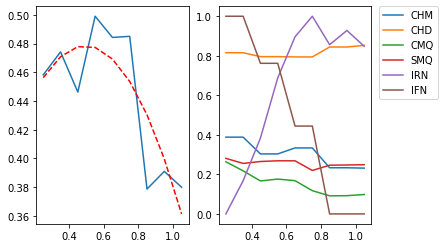




Data for Prasad108__TutesMessanger_30_06_01_04_58.csv


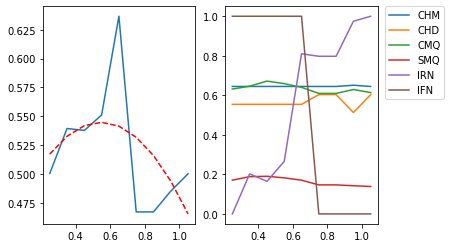




Data for Amrivya__ssm_30_06_01_56_40.csv


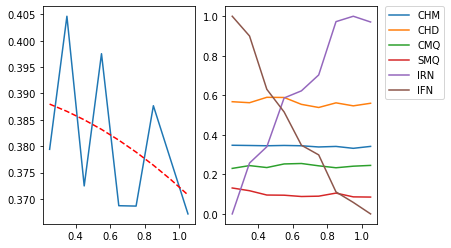




Data for spring-blog_30_06_18_38_24.csv


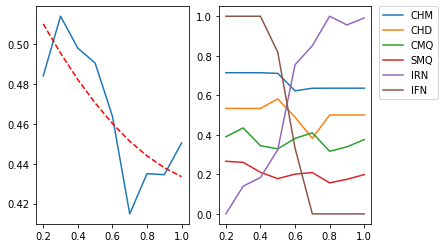




Data for vmluan__sanyo_30_06_04_36_49.csv


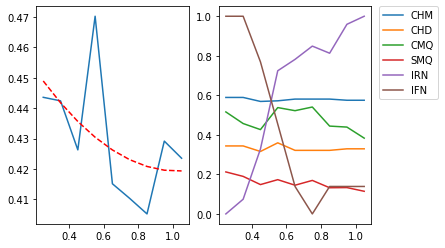




Data for spring-blog_30_06_18_22_07.csv


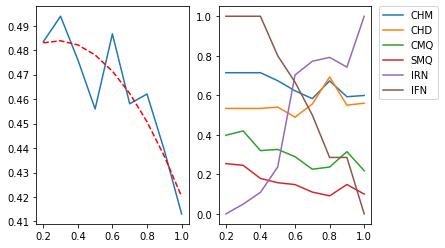




Data for spring-blog_30_06_18_17_19.csv


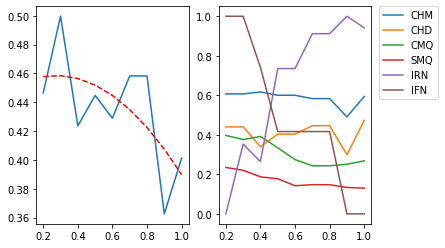




Data for spring-blog_30_06_18_55_08.csv


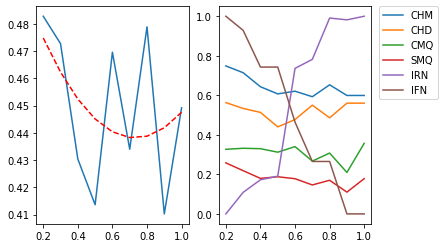




Data for liuwuxiang__property_app_30_06_05_47_43.csv


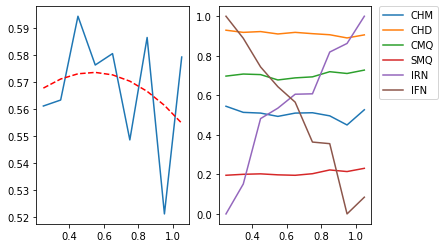




Data for vrushak__HMS_30_06_01_49_22.csv


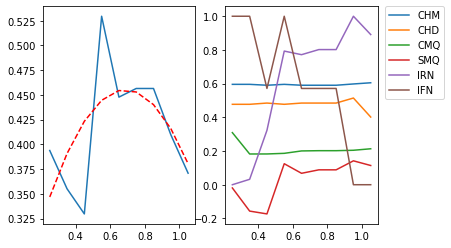




Data for thenhkid__universalTranslator_30_06_04_47_39.csv


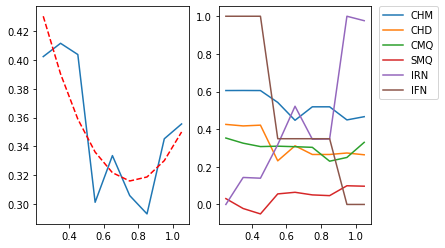




Data for Aaryatech__ShivShambhuAdmin_30_06_07_09_01.csv


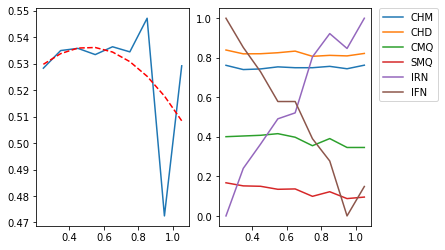




Data for spring-blog_01_07_16_42_01.csv


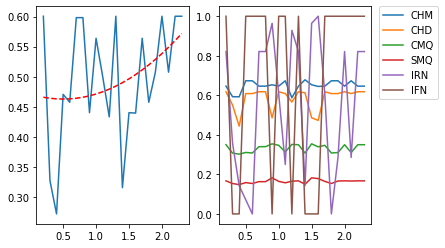




Data for spring-blog_01_07_16_27_58.csv


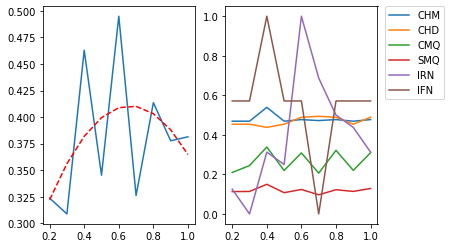




Data for giibeom__Project_NMJ_30_06_02_37_30.csv


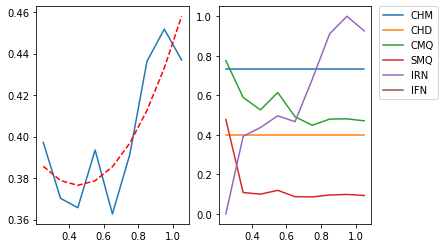




Data for nie-lei__gyxg_30_06_07_36_26.csv


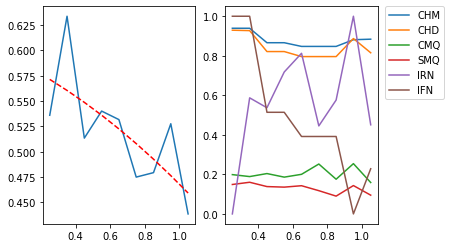




Data for LUISURBM__gitpod-geeks_30_06_01_02_58.csv


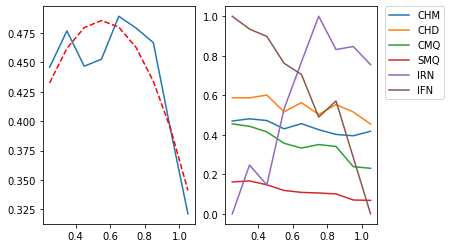




Data for arjccm__arjccm_std_30_06_00_42_21.csv


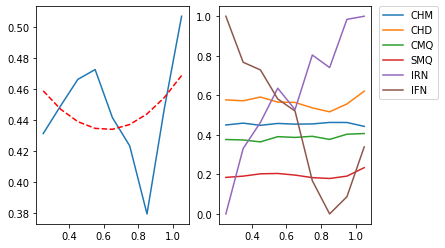




Data for thinkaboutgod__dsmp_30_06_08_22_56.csv


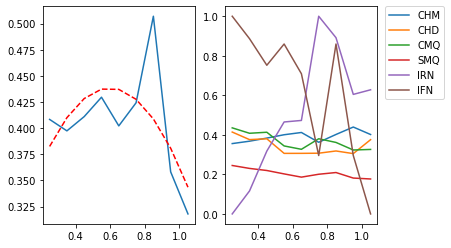




Data for spring-blog_30_06_18_52_08.csv


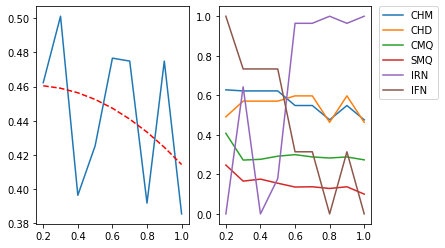




Data for GiorgioNatili__BBitaly_30_06_02_17_53.csv


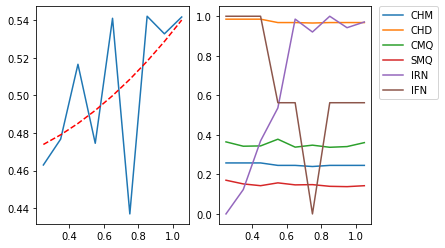




Data for spring-blog_30_06_17_42_44.csv


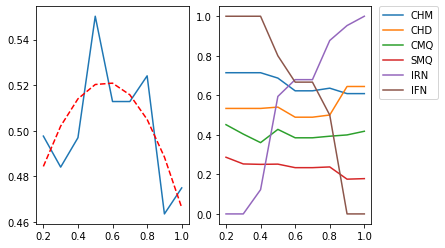




Data for J-E-KIM__uploadProjects_30_06_02_24_08.csv


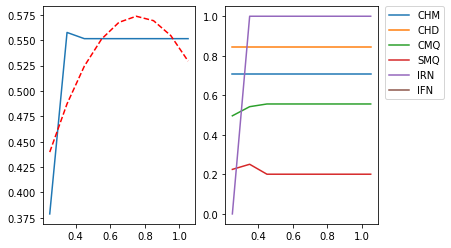




Data for spring-blog_30_06_15_51_50.csv


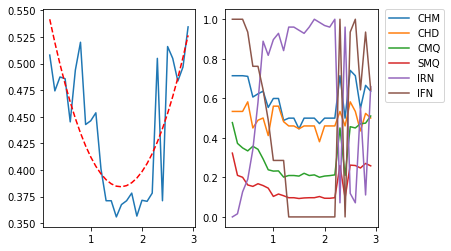




Data for spring-blog_30_06_18_44_49.csv


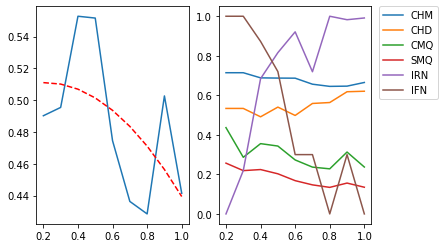




Data for KosmoHelper__kosmo_30_06_00_46_26.csv


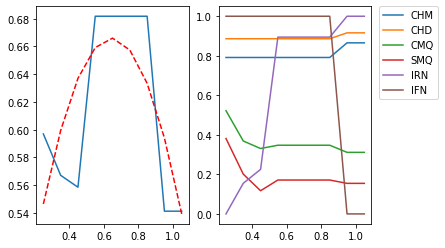




Data for spring-blog_01_07_16_32_15.csv


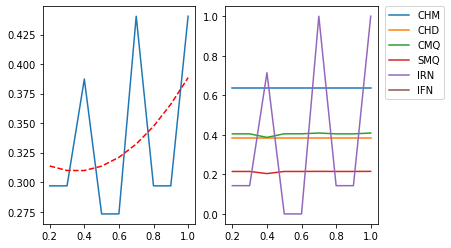




Data for EUSurvey__EUSURVEY_30_06_06_42_15.csv


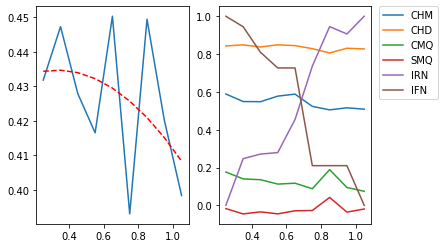




Data for spring-blog_30_06_17_20_55.csv


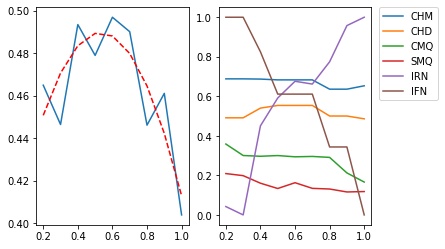




Data for lqj12267488__Gemini_30_06_01_46_37.csv


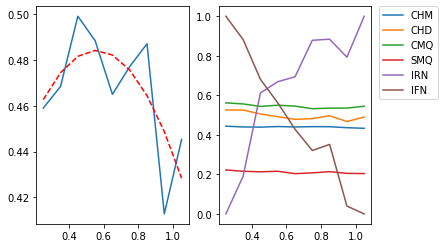




Data for spring-blog_01_07_16_30_33.csv


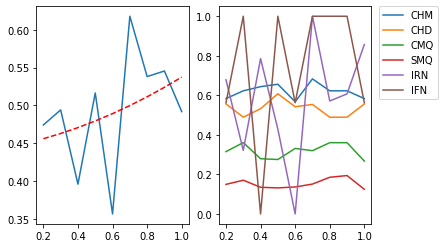




Data for lisanlong__afn-platform-dlp_30_06_01_07_45.csv


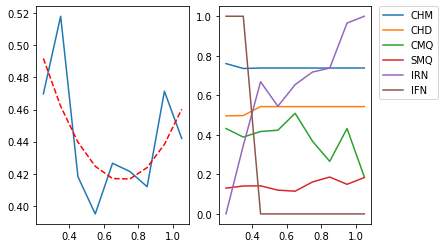




Data for jiance520__hshop_30_06_05_53_40.csv


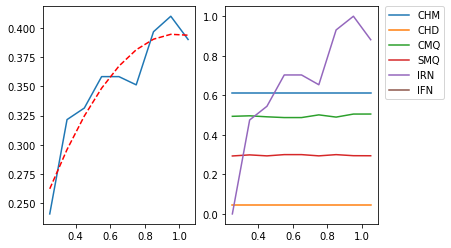




Data for FnGZS__ZYPcrazy_30_06_03_40_08.csv


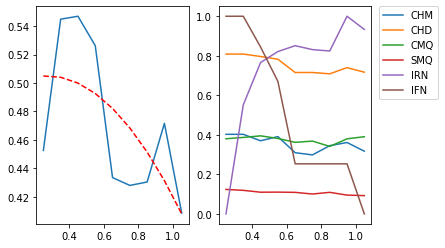




Data for hmlin5__jianshen_30_06_05_51_55.csv


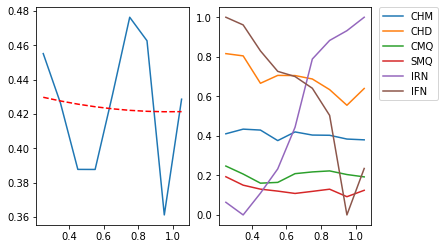




Data for spring-blog_30_06_18_06_21.csv


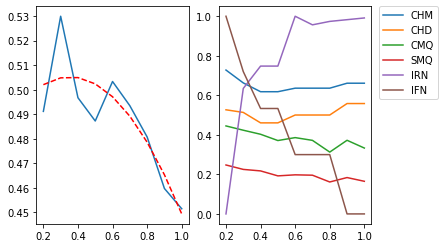




Data for spring-blog_30_06_15_42_00.csv


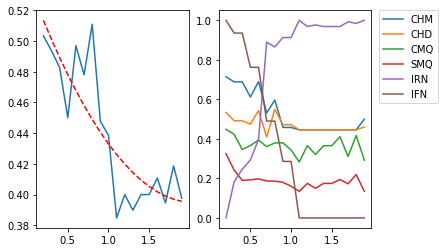




Data for Tedstack__timebank_30_06_07_29_31.csv


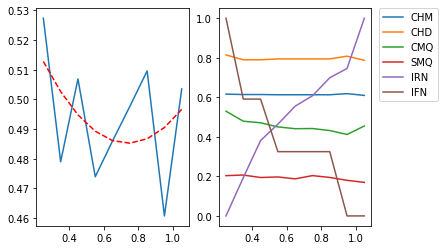




Data for yuriv218__kim_yuri_30_06_02_14_24.csv


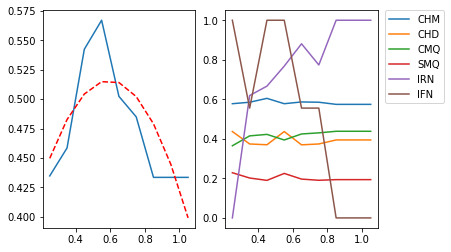




Data for asiri07__farmnew_30_06_08_18_42.csv


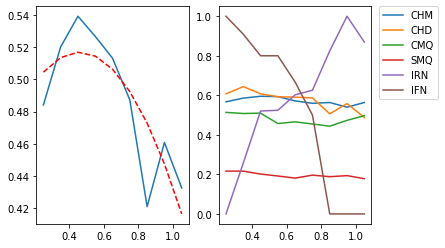




Data for SunGitShine__tgm-manage_30_06_01_32_31.csv


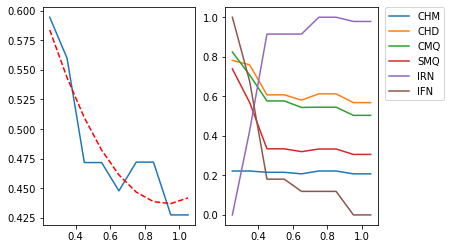




Data for spring-blog_30_06_18_25_59.csv


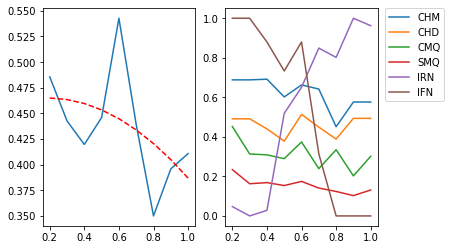




Data for dovier__coj-web_30_06_03_44_20.csv


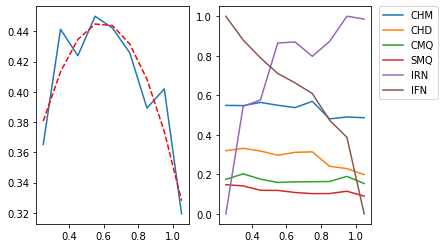




Data for spring-blog_30_06_17_40_34.csv


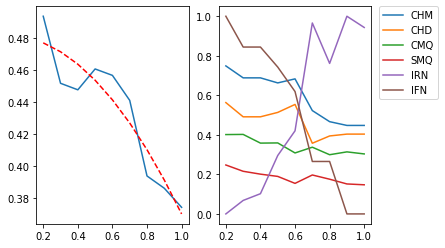




Data for ruanzhihao__OnlineExamSystem_30_06_01_09_29.csv


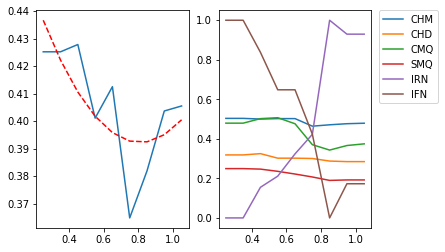




Data for agilefant_01_07_16_51_01.csv


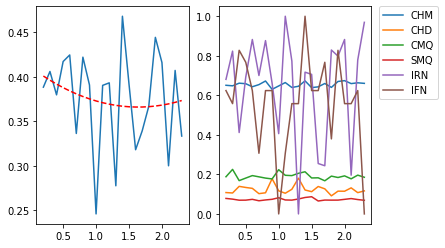




Data for spring-blog_30_06_18_53_39.csv


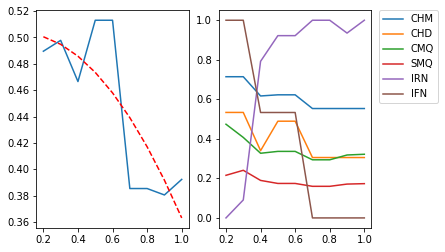




Data for nagaraju275521__fom3.0_30_06_08_28_23.csv


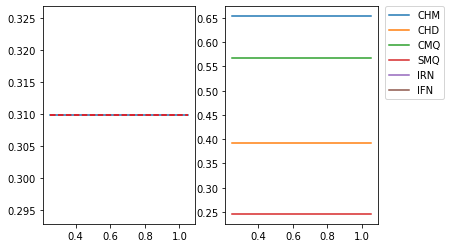




Data for spring-blog_30_06_18_04_32.csv


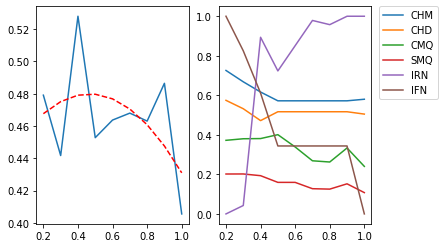




Data for djyoon956__OWL_30_06_02_25_33.csv


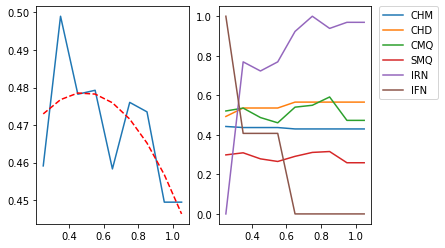




Data for spring-blog_30_06_18_19_09.csv


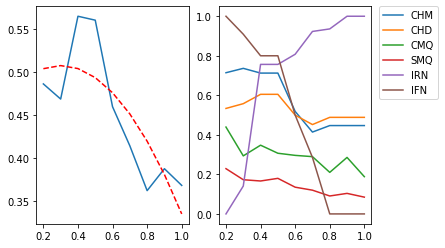




Data for wangshuo1468__swingShengChengQi_30_06_02_32_40.csv


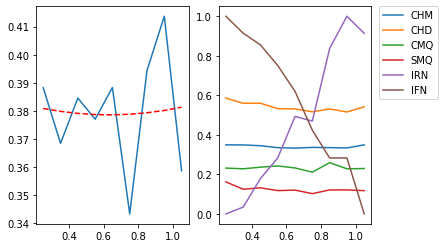




Data for wangxixi123-abc__arjcm_std_30_06_06_59_07.csv


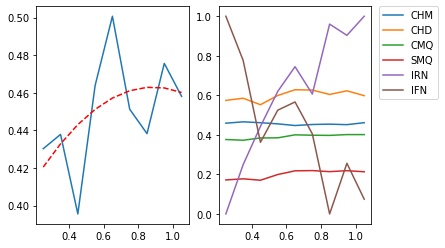




Data for spring-blog_30_06_16_34_07.csv


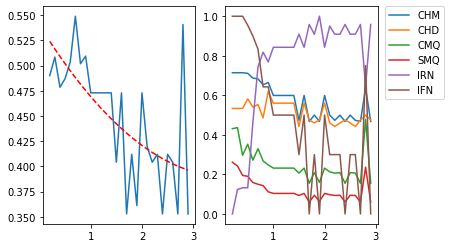




Data for mcneilco__acas-roo-server_30_06_01_22_50.csv


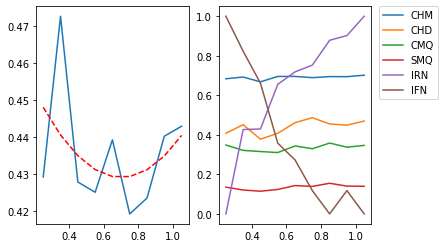




Data for bodenlab__GRASP_30_06_05_02_34.csv


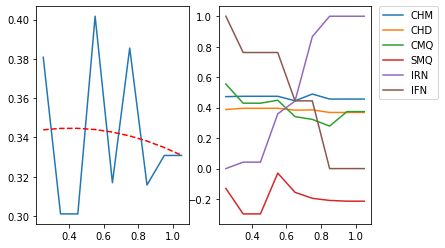




Data for zhoumac__com-kefu_30_06_07_25_55.csv


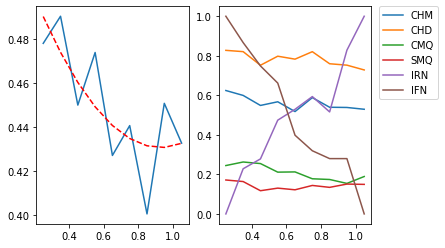




Data for Gulrez911__AssessmentAppABM_30_06_05_39_27.csv


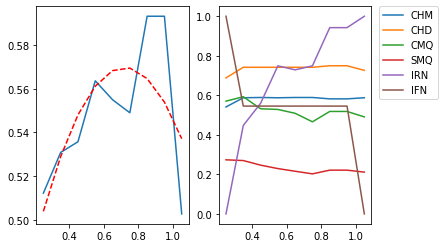




Data for spring-blog_30_06_18_46_38.csv


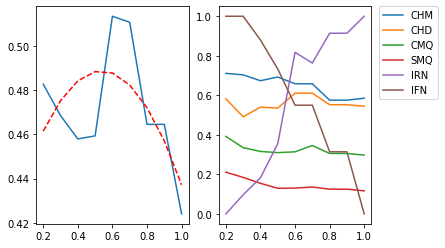




Data for minender__miniproyectoSepDic2017_30_06_04_00_56.csv


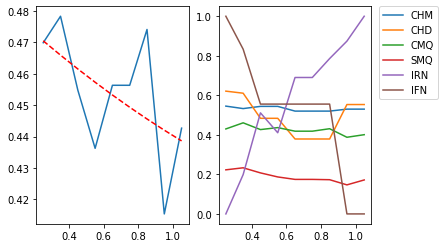




Data for spring-blog_30_06_18_15_04.csv


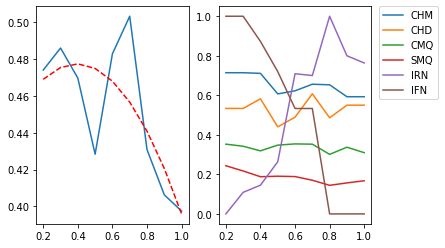




Data for gateshibill__suit_tiles_30_06_01_13_31.csv


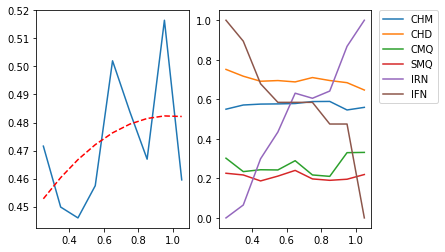




Data for prakash90-cpu__jswRepo_30_06_07_03_35.csv


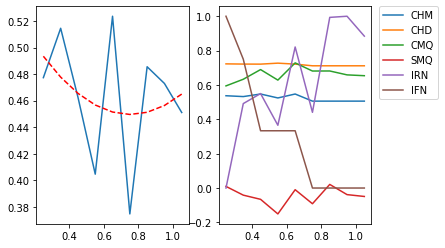




Data for chetanlohar__OnlineShodh_30_06_08_21_06.csv


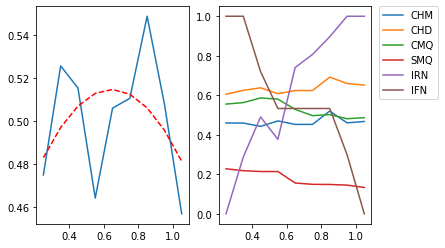




Data for MartinEmbers__Mpp.MedicalCenter_30_06_01_58_34.csv


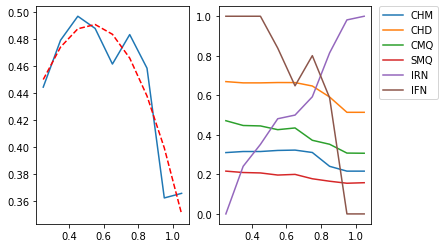




Data for jembi__bsis_30_06_07_18_12.csv


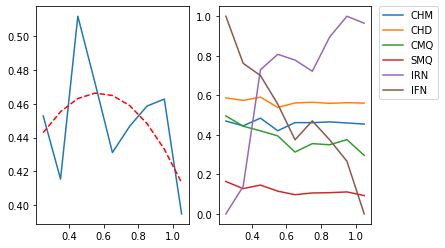




Data for ramupp__Retail-Management-System_30_06_08_00_33.csv


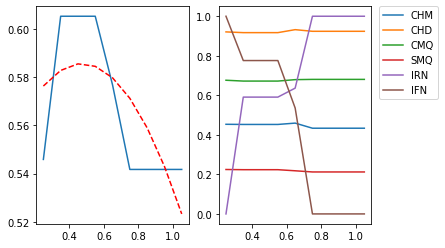




Data for Phoxine__KarpyShopping_30_06_07_49_18.csv


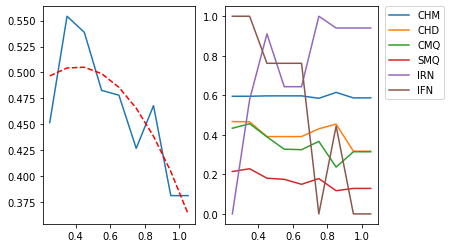




Data for spring-blog_30_06_18_10_03.csv


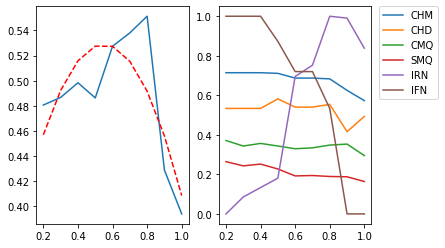




Data for narugang__cafeService_30_06_08_02_18.csv


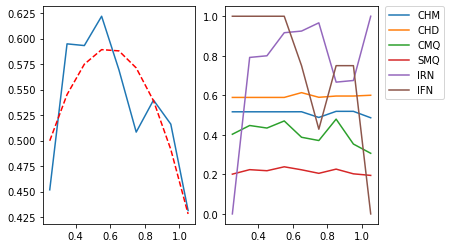




Data for spring-blog_30_06_16_58_12.csv


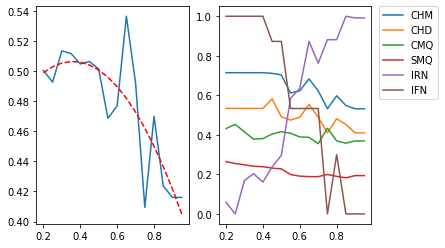




Data for spring-blog_30_06_18_02_42.csv


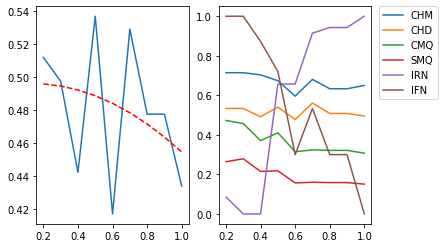




Data for Lida52jiao__ks_user_30_06_00_52_14.csv


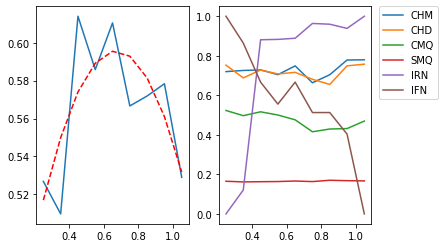




Data for polo0908__supplier_30_06_03_11_40.csv


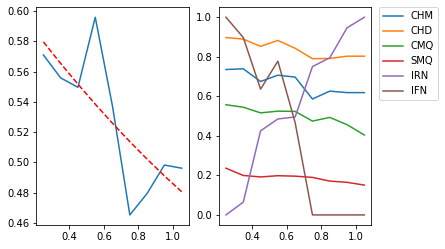




Data for swt14w01__JRMDS_30_06_00_44_26.csv


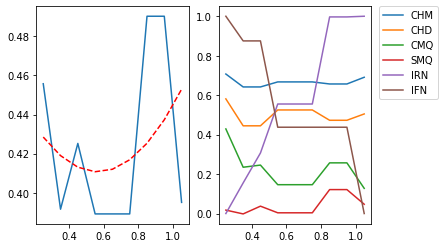




Data for spring-blog_30_06_16_47_25.csv


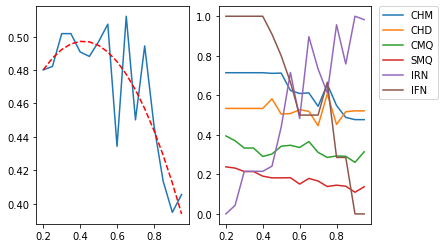




Data for motoband__motoband_cms_30_06_08_08_27.csv


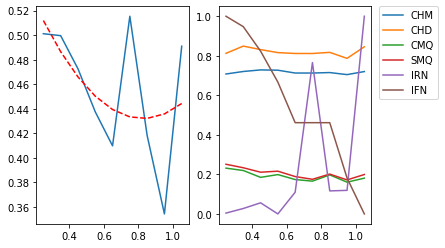




Data for spring-blog_30_06_17_12_51.csv


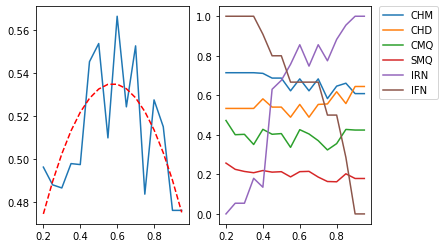




Data for spring-blog_30_06_18_31_45.csv


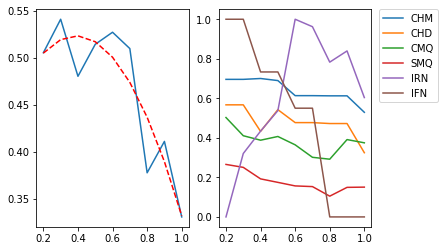




Data for PrakashTrove__online-banking-application_30_06_02_16_12.csv


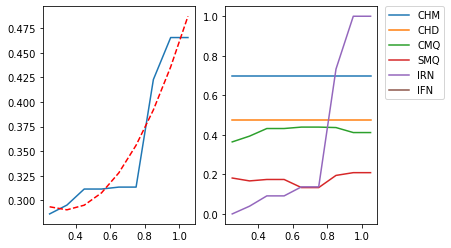




Data for MattJasonLu__SVSP_0.4_30_06_05_27_51.csv


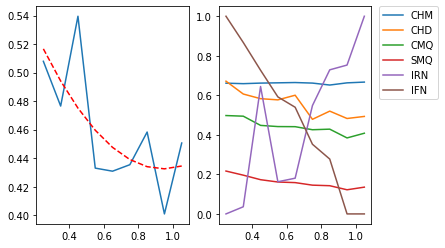




Data for spring-blog_30_06_15_30_30.csv


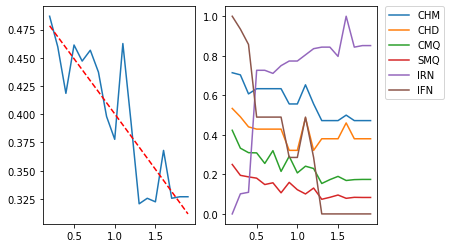




Data for MrHusm__kanshu-app_30_06_07_11_28.csv


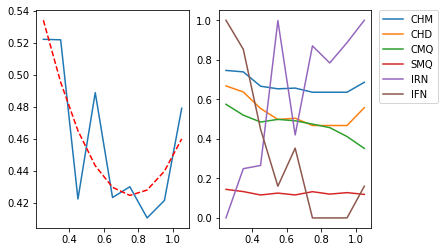




Data for spring-blog_30_06_18_28_12.csv


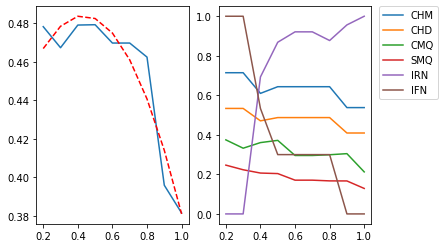




Data for thitranthanh__fstack-file-server_30_06_00_58_42.csv


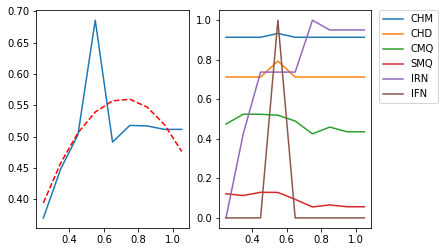




Data for spring-blog_30_06_16_39_27.csv


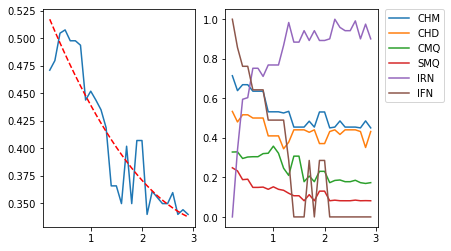




Data for baccolini__pocmanager_30_06_02_09_06.csv


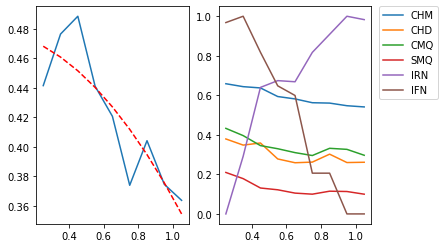




Data for dcl8261425__saas_30_06_02_45_41.csv


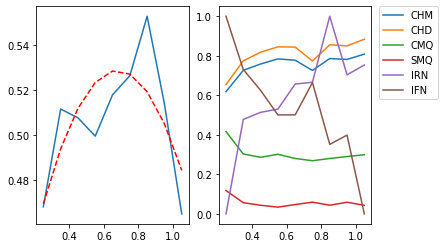




Data for Aaryatech__HrEasyPune_30_06_04_56_16.csv


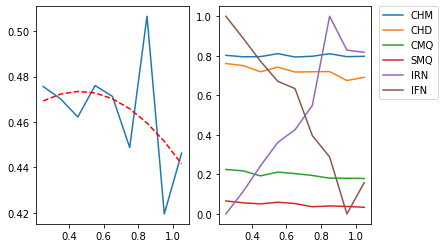




Data for spring-blog_30_06_18_35_24.csv


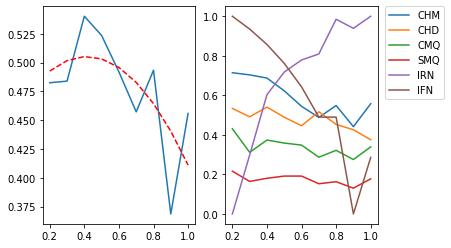




Data for spring-blog_30_06_17_00_37.csv


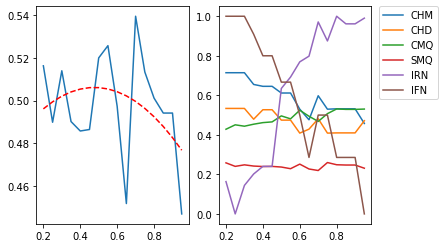




Data for wisewin-tech__language-talent-backend_30_06_07_51_41.csv


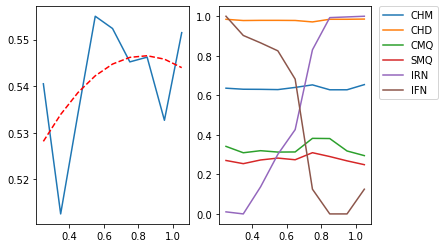




Data for wdwhwn__wbsc-user_30_06_07_47_10.csv


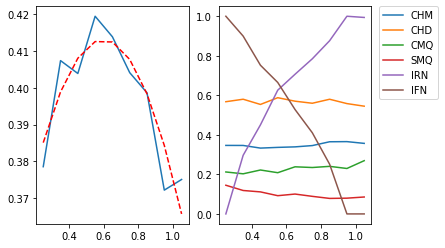




Data for thenhkid__health-e-link_30_06_03_23_39.csv


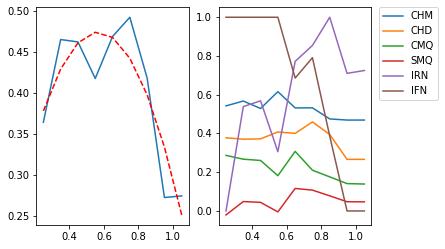




Data for spring-blog_30_06_17_45_10.csv


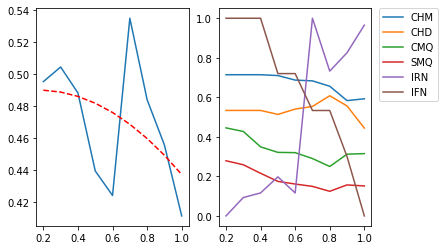




Data for spring-blog_30_06_18_43_14.csv


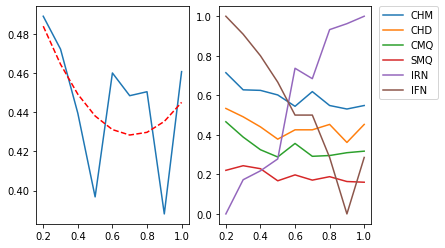




Data for zhoumingkun__reportingBlackSystem_30_06_04_49_34.csv


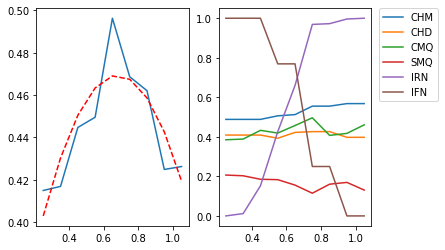




Data for spring-blog_30_06_17_18_06.csv


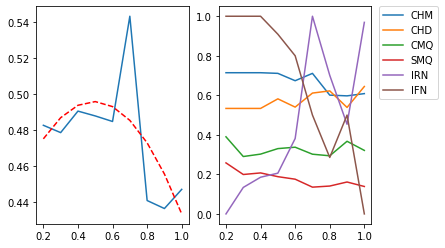




Data for jyotishmoy88__onlineBakingapplication_30_06_02_00_22.csv


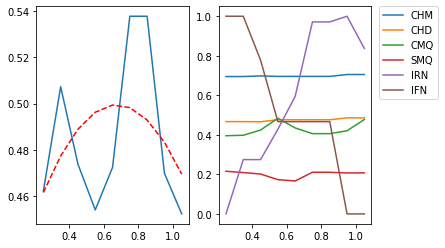




Data for spring-blog_30_06_17_06_26.csv


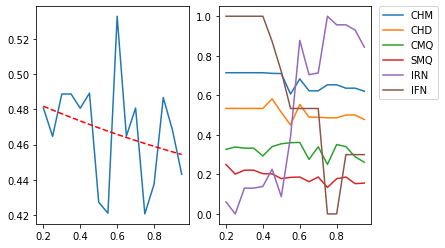




Data for Zct-123__cosines_30_06_03_52_33.csv


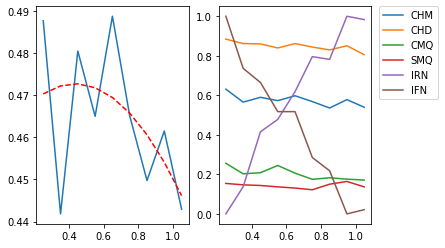




Data for spring-blog_30_06_17_57_23.csv


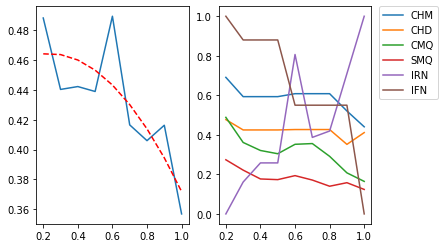




Data for davideelliot94__ISSSR-backend_30_06_02_12_56.csv


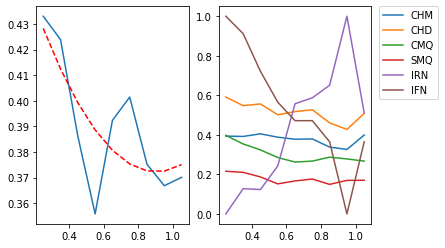




Data for dragonknightjaja__campus_30_06_07_19_39.csv


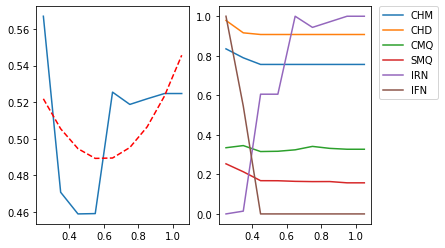




Data for spring-blog_01_07_16_37_48.csv


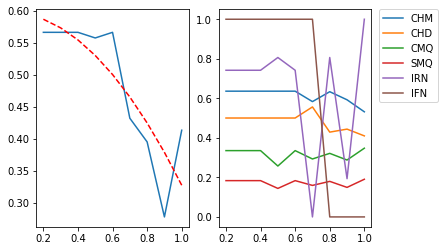




Data for fanrencainiao__youxinservers_30_06_00_48_58.csv


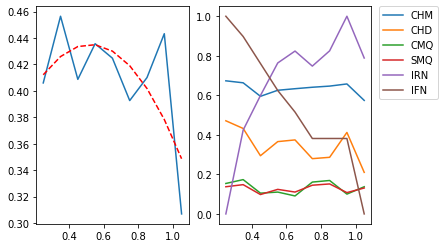




Data for DMcoders__chengyuanerp_30_06_03_30_48.csv


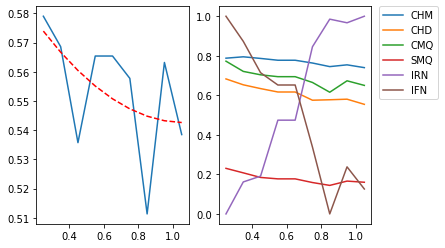




Data for Bobhaobo__DrBroswer-SSM_30_06_03_26_37.csv


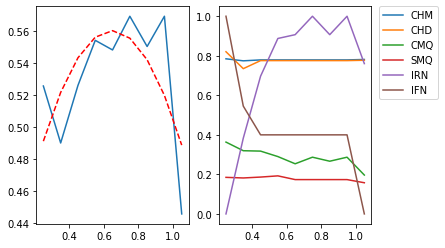




Data for zah5897__nearby_30_06_02_35_58.csv


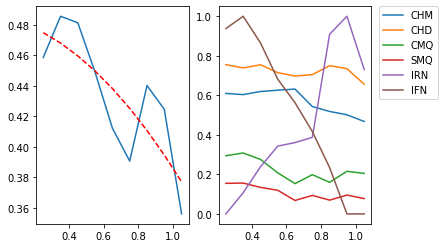




Data for azxctor__AyjrFiance_30_06_04_13_26.csv


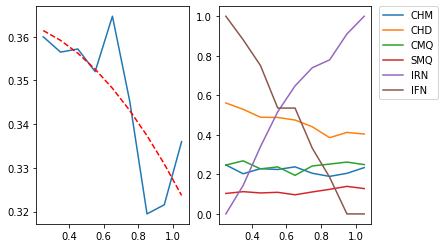




Data for 969778578__LDMES_30_06_04_24_32.csv


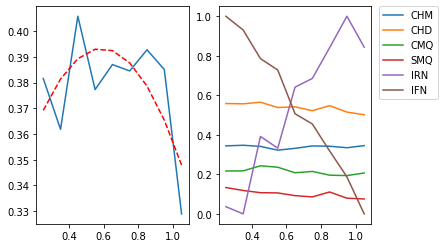




Data for sougetsu__filemanage_30_06_05_36_23.csv


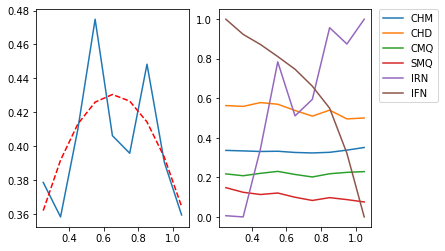

In [46]:
# Read all csv
total = 0
csvs = []
for cur, directories, files in os.walk('.'):
    for f in files:
        if 'csv' in f:
            total += 1
            csvs.append(f)

            
for f in csvs:
    print(f"\n\n\nData for {f}")
    df = read_csv(f)
    df = normalize_data(df)
    df = adjust_values(df)
    df = calculate_total(df)
    plot(df)
